In [164]:
import math
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

from scipy.fftpack import fft, fftfreq, fftshift, ifft, rfft, dct, idct
from numpy import pi, real, random, sin, cos
from numpy.random import randn
from matplotlib.pyplot import plot, subplot

mpl.rc('figure', figsize=[16,5])

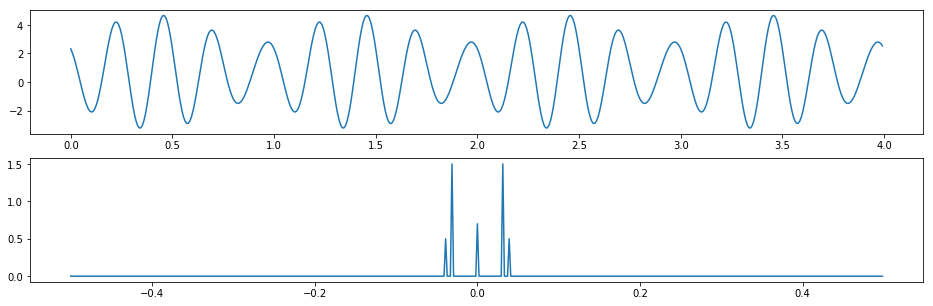

In [170]:
L = 4
N = 512

X = np.linspace(0,  L,  N+1)[0:N]
fX = sin(5 * 2 * pi * X) + 3 * cos(4 * 2 * pi * X + 1) + 0.7
FX = fft(fX)

subplot(211)
plot(X, fX)

subplot(212)
plot(fftshift(fftfreq(N)), fftshift(abs(FX))/N)

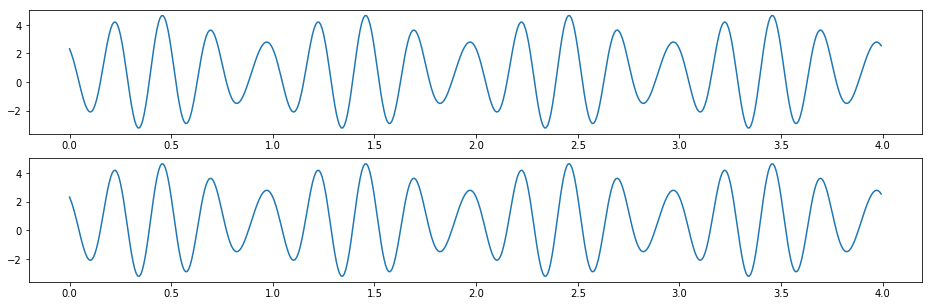

In [171]:
subplot(211)
plot(X, ifft(FX))

subplot(212)
y = [(FX * np.exp(2*pi*(1j)*np.arange(N)*i/N)).mean() for i in range(N)]
plot(X, y)

In [157]:
# The returned complex array contains ``y(0), y(1),..., y(n-1)`` where

# ``y(j) = (x * exp(2*pi*sqrt(-1)*j*np.arange(n)/n)).mean()``.

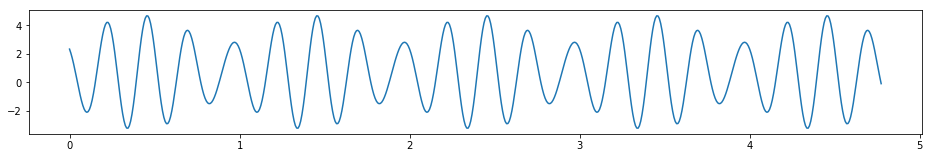

In [172]:
subplot(211)
x_step = X[1] - X[0]
forecast_step = 100
X2 = np.concatenate((X, np.linspace(X[-1] + x_step,  X[-1] + forecast_step * x_step,  forecast_step)))

y2 = [(FX * np.exp(2*pi*(1j)*np.arange(N)*i/N)).mean() for i in range(N + forecast_step)]
plot(X2, y2)

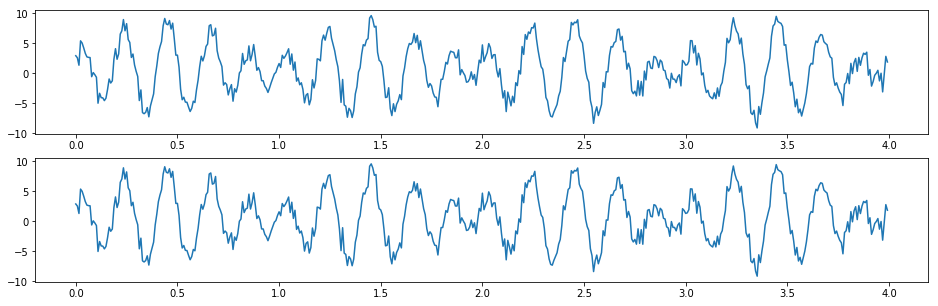

In [196]:
fX = 5 * sin(5 * 2 * pi * X) + 3 * cos(4 * 2 * pi * X + 1) + 0.7 + np.random.randn(N)
FX = fft(fX)

subplot(211)
plot(X, fX)

subplot(212)
plot(X, np.real(ifft(fft(fX))))

<StemContainer object of 3 artists>

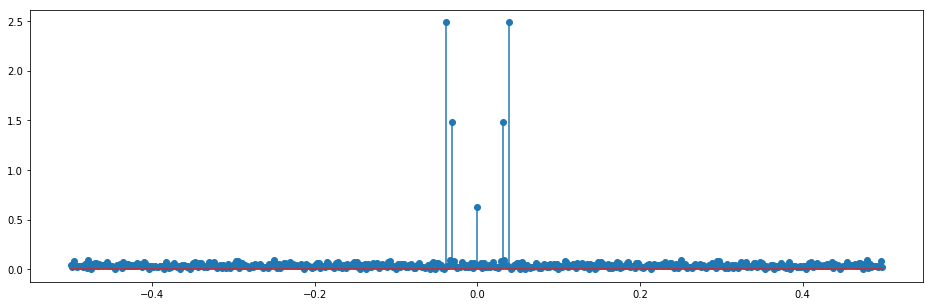

In [197]:
plt.stem(fftfreq(N), abs(FX)/N)

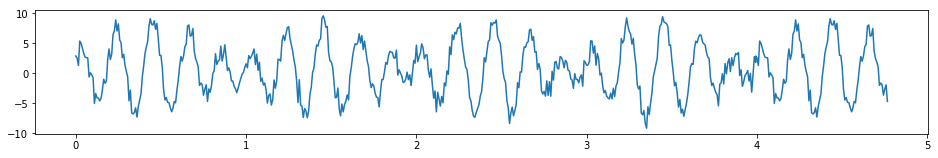

In [198]:
subplot(211)

x_step = X[1] - X[0]
forecast_step = 100
X2 = np.concatenate((X, [X[-1] + i * x_step for i in range(forecast_step)]))

y2 = [(FX * np.exp(2*pi*(1j)*np.arange(N)*i/N)).mean() for i in range(N + forecast_step)]
plot(X2, y2)